In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

In [2]:
def find_fraction_of_good_Ev( sample=None, good_percentage=15 ):
    Ngood = len(sample[np.abs(sample)<good_percentage])
    fgood = float(Ngood) / len(sample)
    print "%.1f"%(100.*fgood),'% with ratio<',good_percentage,'%'
    return fgood

# 7 Reconstruction of the incoming Eν for the selected events
Aug 30, 2017

In [3]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/EvReconstruction/'

# pairs of tracks at close proximity

In [4]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
print 
MCbnbMCcosmicPairsFV, MCbnbMCcosmicSamples = load_MCbnbMCcosmicSamples()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%

139258 pairs from MC-BNB + cosmic MC overlay
96025 pairs in FV
19649 are 1mu-1p, 20.5%
16331 are other pairs, 17.0%
60155 are cosmic, 62.6%
--------------------------------------------------------------
7586 are CC 1p 0pi, 7.9%


In [5]:
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers,pureff_MCbnbMCcosmic,pureff_MCbnbMCcosmic_numbers = apply_cuts(PIDa_p_min=10, delta_Delta_phi=40 ,Rmin = (0.,0.,0.))

In [6]:
pureff_MCbnbDATAcosmic

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,None,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
PIDa,87.1%,40.7%,84.4%,12.8%,${PID}_a>10$,87.1% (3323),44.3% (1771),13.6% (3062),84.4% (1041)
length,70.2%,55.3%,71.5%,18.2%,$l_{\mu}>l_{p}$,70.2% (2676),22.9% (918),5.5% (1249),71.5% (882)
non-collinearity,64.4%,69.3%,68.9%,24.0%,"$|\theta_{1,2}-90^0|<60^0$",64.4% (2456),15.8% (632),2.0% (455),68.9% (850)
vertex activity,61.8%,69.4%,65.1%,23.7%,"$(-0.01,-0.01,-0.01)<R_{\Delta Q}^{(U,V,Y)}$",61.8% (2357),15.2% (607),1.9% (430),65.1% (803)
delta phi,36.3%,77.8%,56.3%,39.1%,$|\Delta \phi - \pi|<40^0$,36.3% (1383),4.8% (193),0.9% (201),56.3% (695)
theta_pq,26.1%,90.3%,47.6%,53.4%,$\theta_{pq}<25^0$,26.1% (994),2.1% (86),0.1% (21),47.6% (588)
soft Pt,29.7%,85.9%,50.6%,47.4%,$p_{t}<0.35$ GeV/c,29.7% (1132),2.8% (111),0.3% (75),50.6% (625)
tight Pt,13.9%,94.5%,28.8%,63.3%,$p_{t}<0.15$ GeV/c,13.9% (530),0.7% (27),0.0% (4),28.8% (355)


## 7.I Calorimetric reconstruction of the incoming neutrino energy

20.0 % with ratio< 8 %
21.7 % with ratio< 8 %
28.9 % with ratio< 8 %
48.7 % with ratio< 8 %


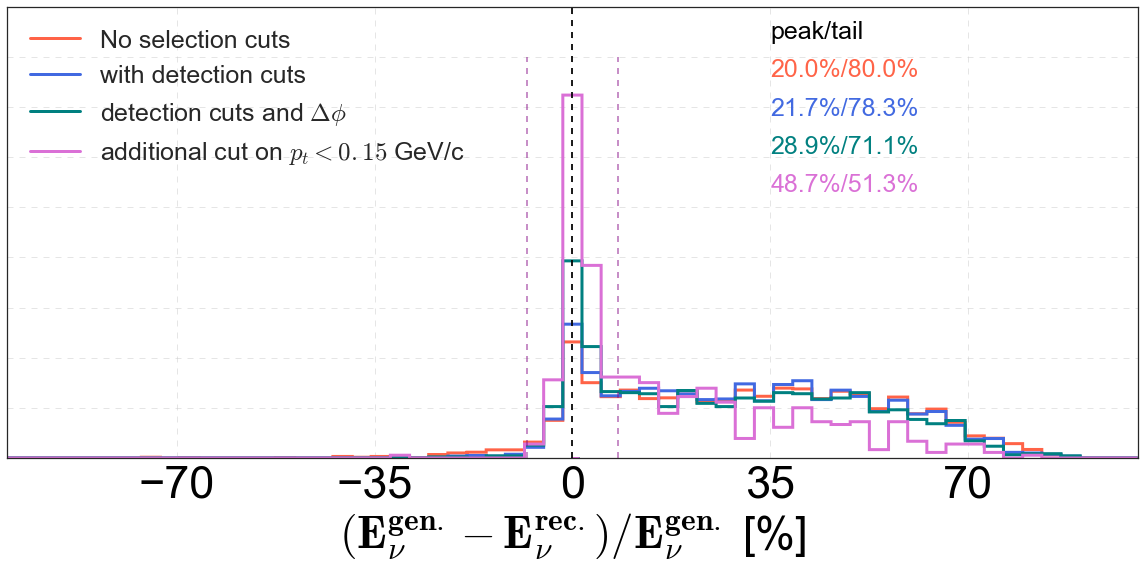

In [21]:
# Ev before and after the cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,60)
fgood_arr = []
cuts   = ['no cut','vertex activity', 'delta phi' , 'tight Pt' ]                                
cut_labels = ['No selection cuts','with detection cuts','detection cuts and $\\Delta \\phi$', 'additional cut on $p_{t}<0.15$ GeV/c']
cut_colors = ['tomato','royalblue','teal','Orchid']
for cut_name,label,color in zip(cuts,cut_labels,cut_colors):
    sample = reduced_MCbnbDATAcosmicSamples[cut_name]['1mu-1p']
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( 35 , 0.95*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='black' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,cut_colors):    
    plt.text( 35 , 0.95*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%'  , fontsize=25 , color=color )
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
# ax.set_title('all $\\mu p$ pairs',fontsize=25,y=1.02)
ax.legend(loc='upper left',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructed.pdf')

## 7.III Reconstructed pt

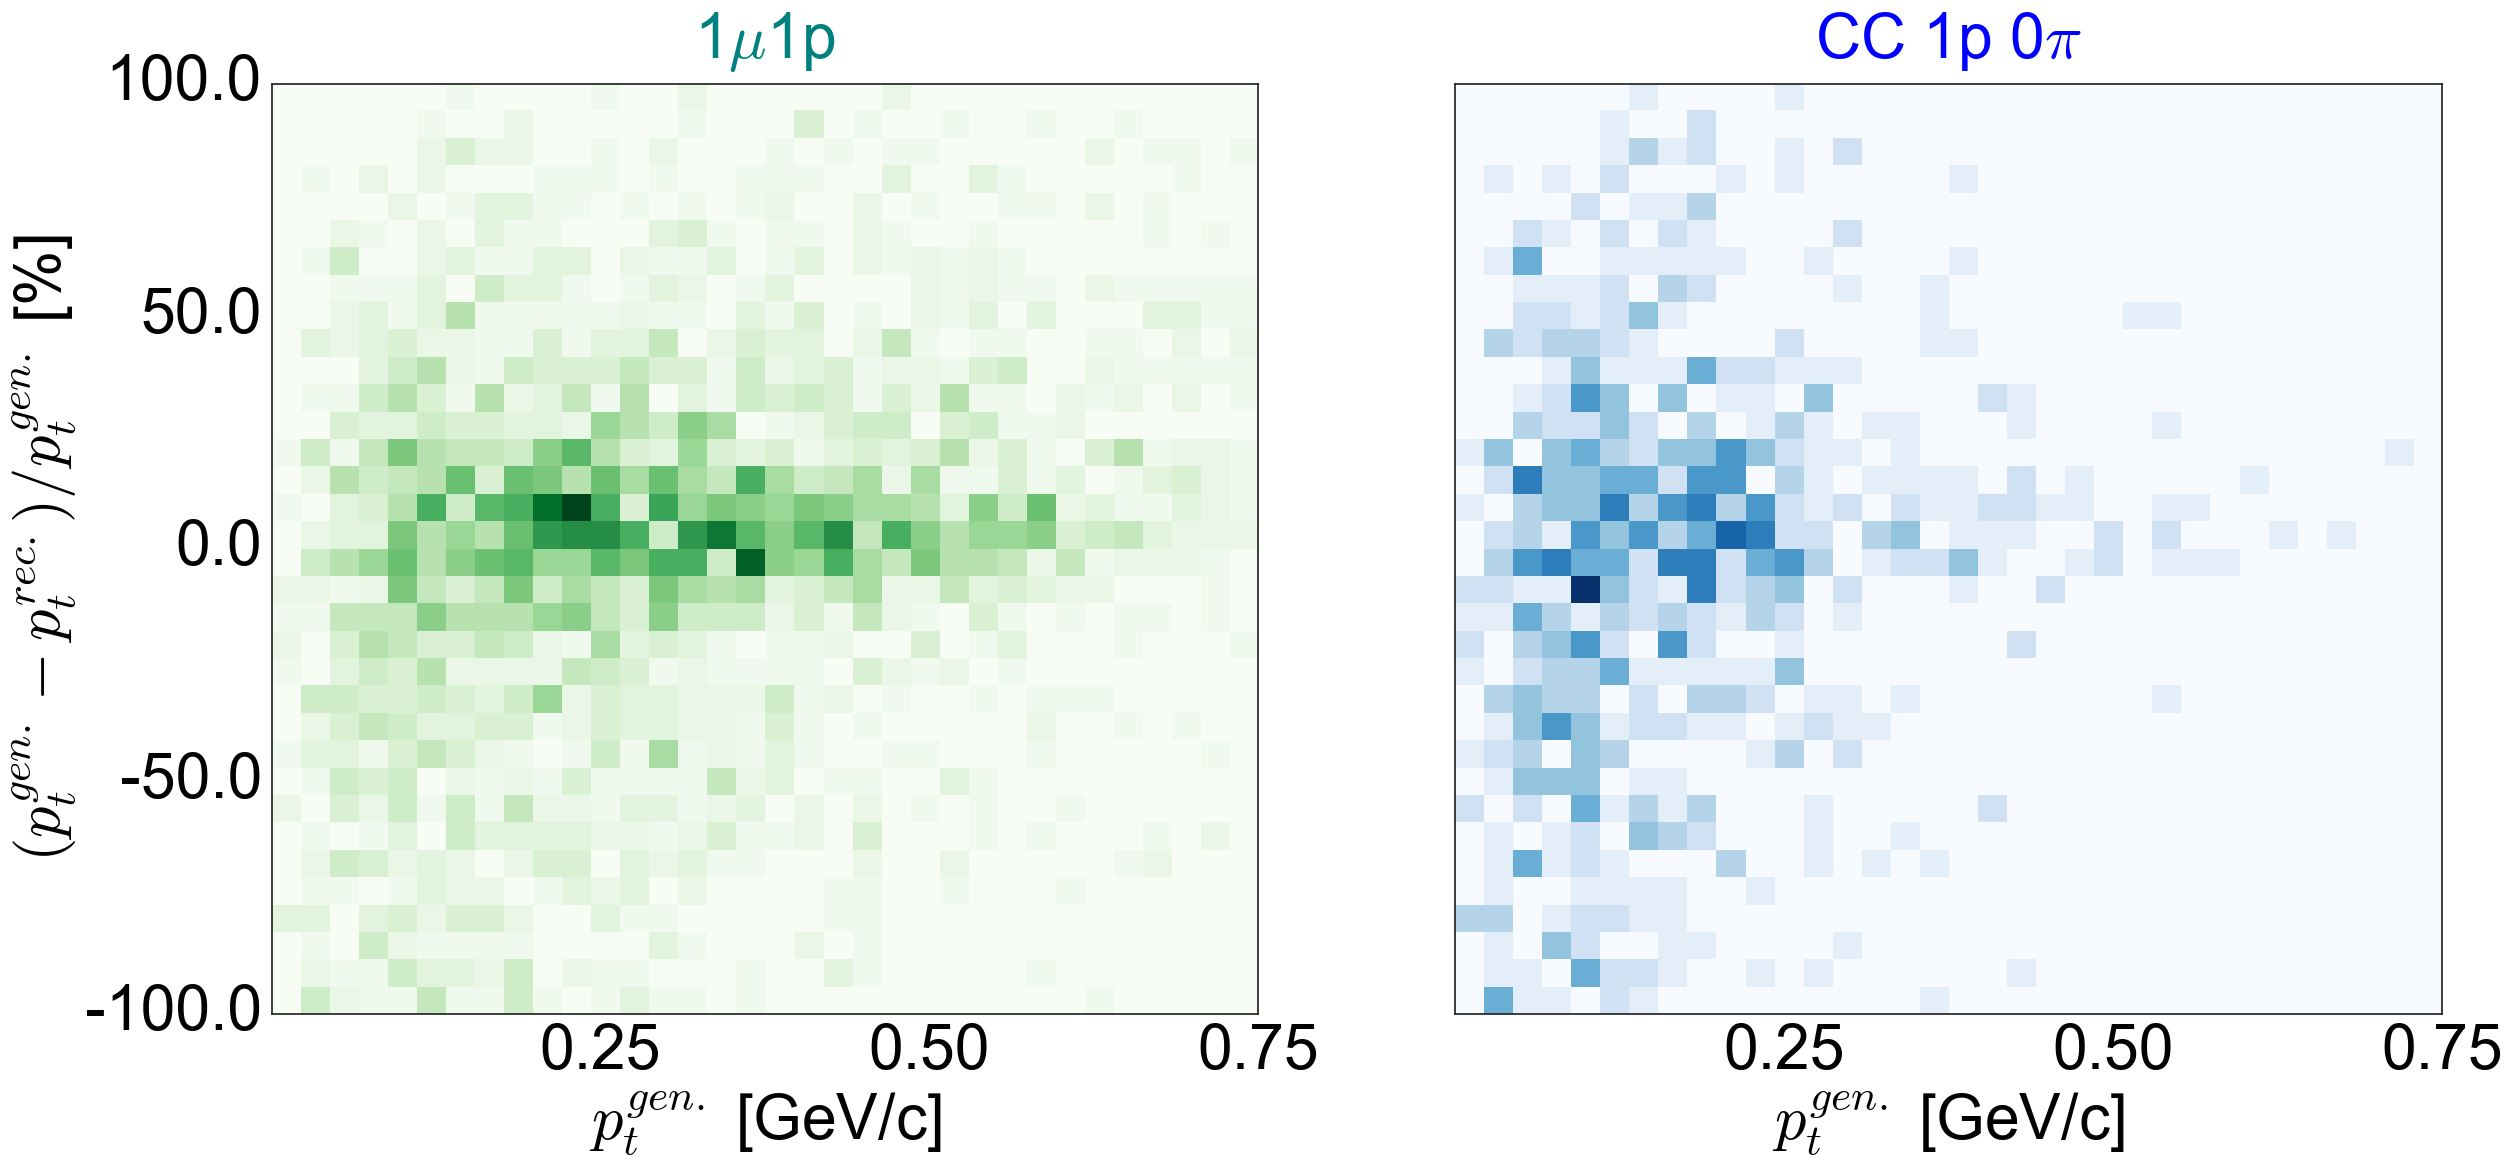

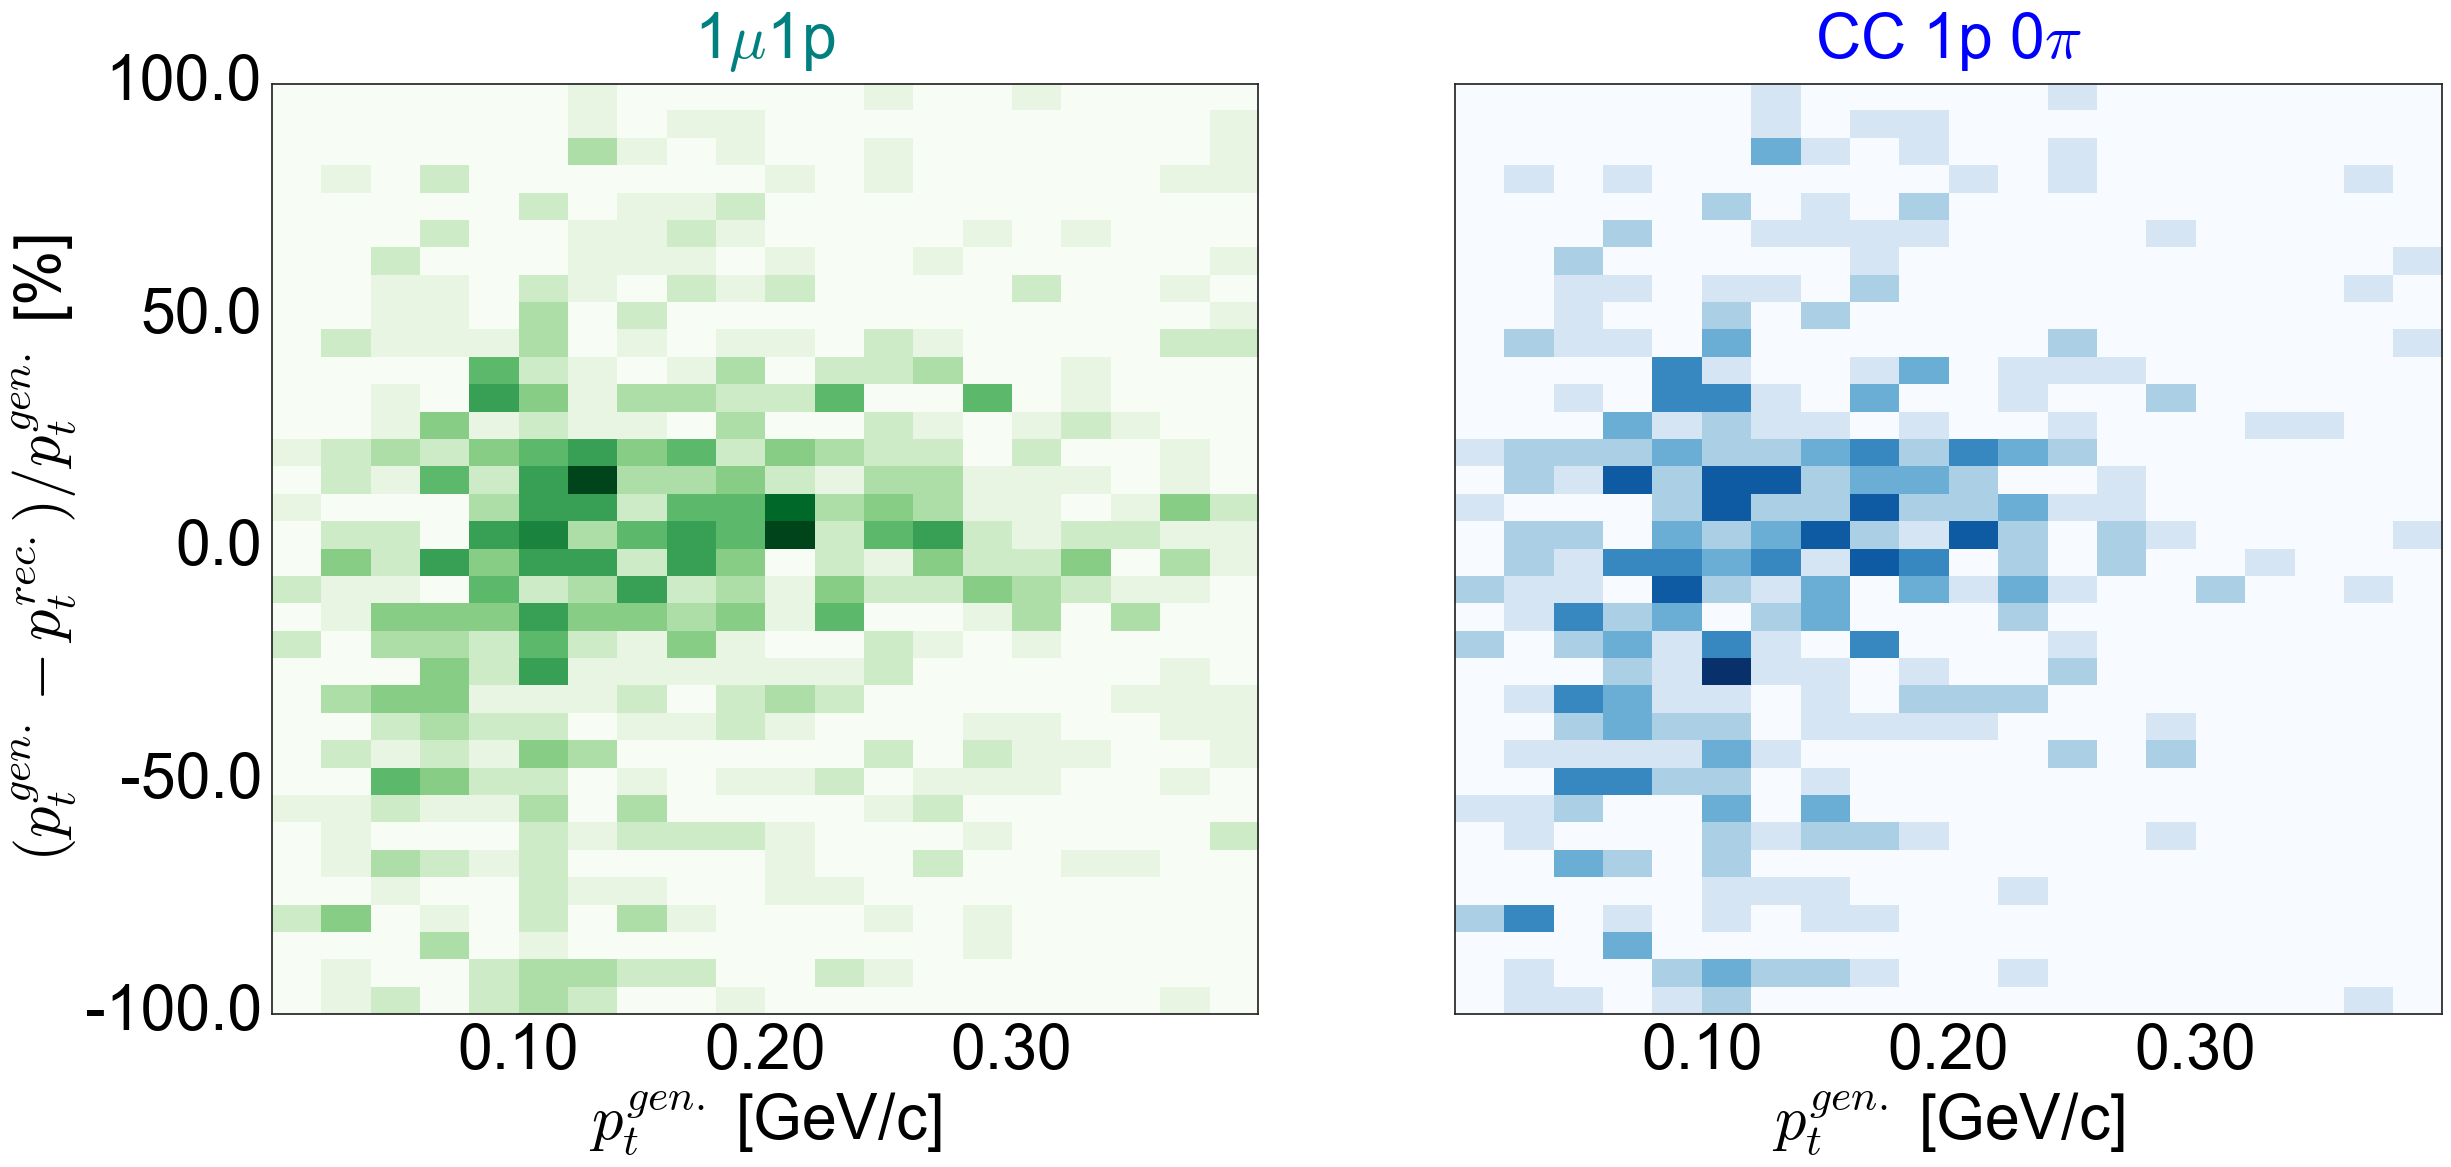

In [7]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,0.75,35),np.linspace(-100,100,35))
    
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_Pt'], 
                 100.*(sample['truth_Pt']-sample['reco_Pt'])/sample['truth_Pt'],
                 ax=ax,fontsize=30,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$p_{t}^{gen.}$ [GeV/c]', y_label='$(p_{t}^{gen.}-p_{t}^{rec.})/p_{t}^{gen.}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([0.25,0.5,0.75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    

fig.savefig(figures_path+'Pt_reconstruction.pdf')

bins=(np.linspace(0,0.4,21),np.linspace(-100,100,35))
fig = plt.figure(figsize=(28,12))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['$|\Delta \phi - \pi|<40^{0}$'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_Pt'], 
                 100.*(sample['truth_Pt']-sample['reco_Pt'])/sample['truth_Pt'],
                 ax=ax,fontsize=30,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$p_{t}^{gen.}$ [GeV/c]', y_label='$(p_{t}^{gen.}-p_{t}^{rec.})/p_{t}^{gen.}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([0.1,0.2,0.3])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
fig.savefig(figures_path+'Pt_reconstruction_after_cut_DeltaPhi.pdf')

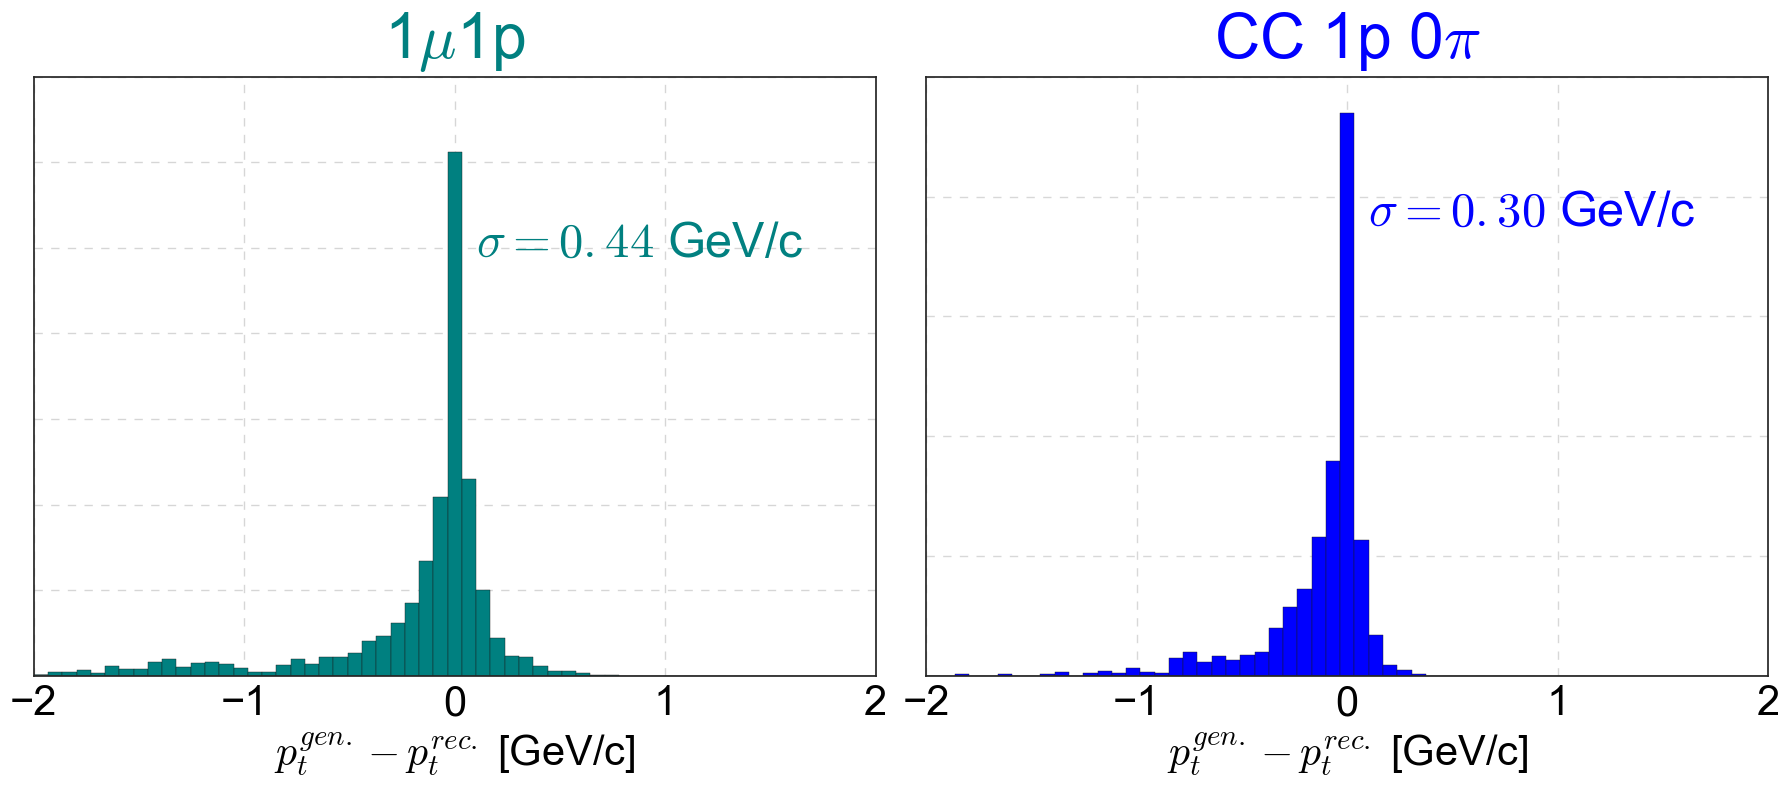

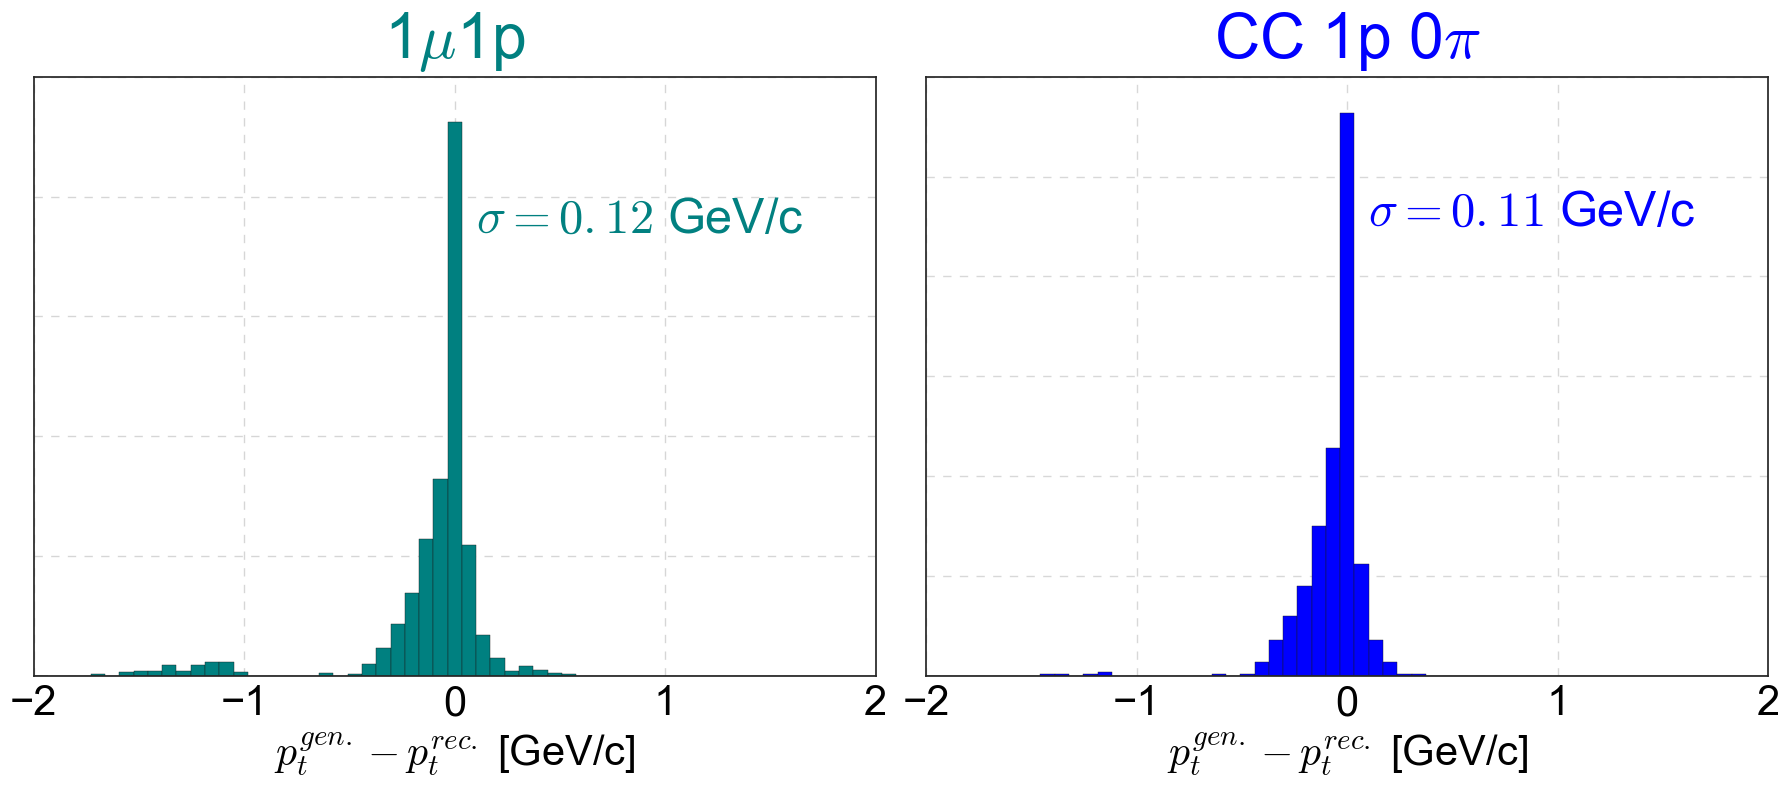

In [8]:
fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_Pt']-sample['reco_Pt'],bins=np.linspace(-2,2,60),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$p_{t}^{gen.}-p_{t}^{rec.}$ [GeV/c]' , '', fontsize=30,do_add_grid=True ,xticks=[-2,-1,0,1,2])
    small_sample = sample[np.abs(sample['truth_Pt']-sample['reco_Pt'])<10]
    sigma = np.std(small_sample['truth_Pt']-small_sample['reco_Pt'])
    plt.text(0.1,0.8*np.max(h),'$\\sigma=%.2f$'%sigma+' GeV/c',color=color,fontsize=35)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'Pt_gen_reco.pdf')


fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['$|\Delta \phi - \pi|<40^{0}$'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_Pt']-sample['reco_Pt'],bins=np.linspace(-2,2,60),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$p_{t}^{gen.}-p_{t}^{rec.}$ [GeV/c]' , '', fontsize=30,do_add_grid=True ,xticks=[-2,-1,0,1,2])
    small_sample = sample[np.abs(sample['truth_Pt']-sample['reco_Pt'])<0.5]
    sigma = np.std(small_sample['truth_Pt']-small_sample['reco_Pt'])
    plt.text(0.1,0.8*np.max(h),'$\\sigma=%.2f$'%sigma+' GeV/c',color=color,fontsize=35)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'Pt_gen_reco_after_cut_DeltaPhi.pdf')

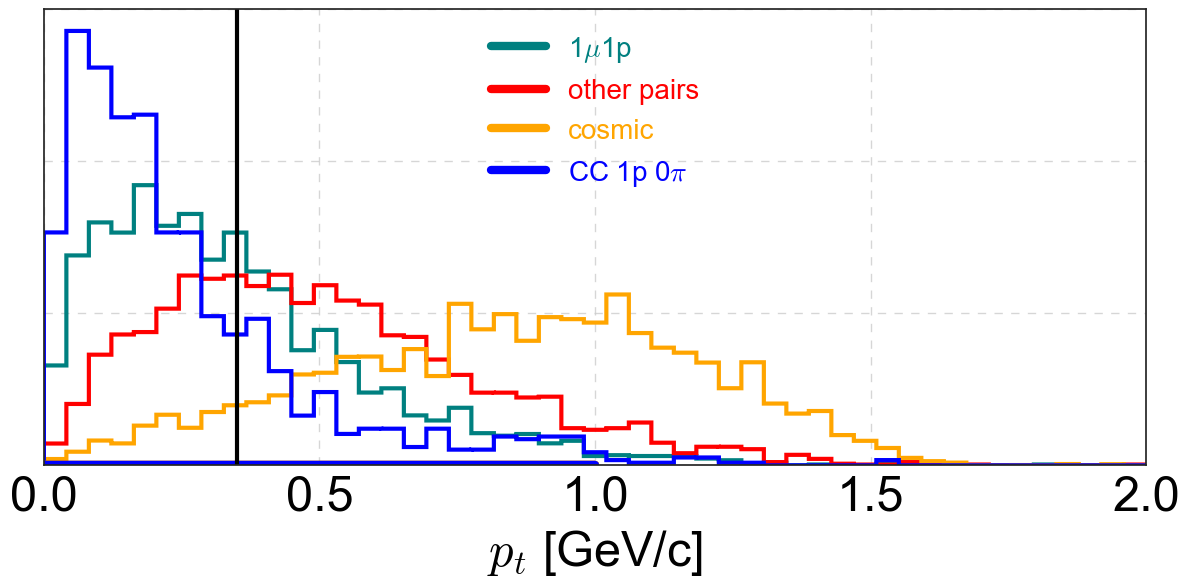

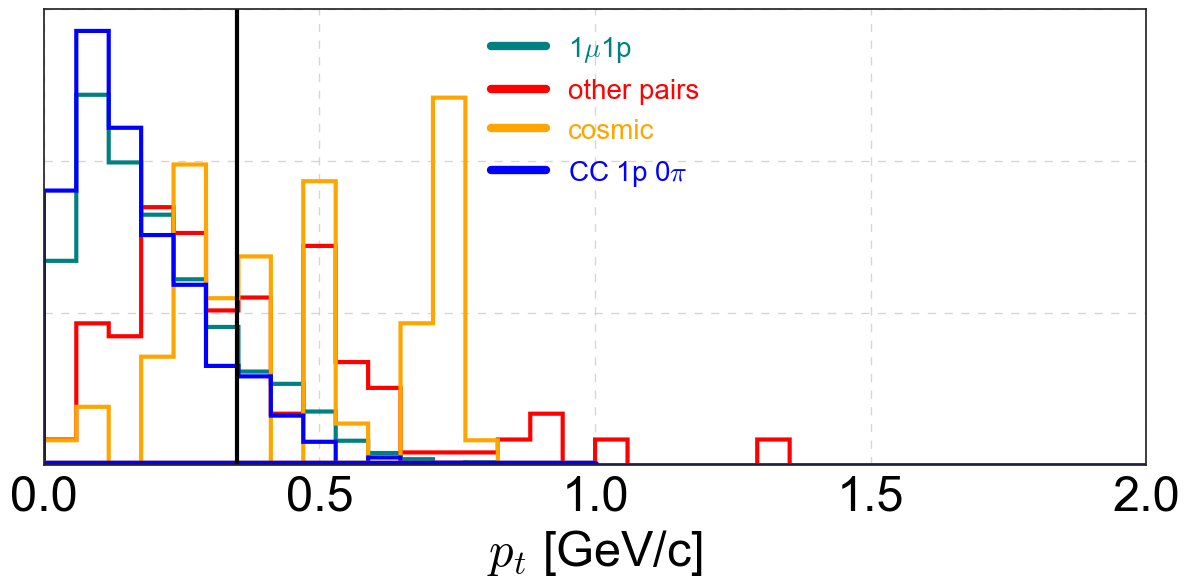

In [9]:
ax=plot_feature_pairs(cut_name='no cut',var='reco_Pt',x_label='$p_{t}$ [GeV/c]'
                              ,bins=np.linspace(0,2,50)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([0.35,0.35],ax.get_ylim(),'-',color='black',linewidth=3)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.tight_layout()
plt.savefig(figures_path+'Pt.pdf')

# after cut 5
ax=plot_feature_pairs(cut_name='$|\Delta \phi - \pi|<40^{0}$',var='reco_Pt',x_label='$p_{t}$ [GeV/c]'
                              ,bins=np.linspace(0,2,35)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.plot([0.35,0.35],ax.get_ylim(),'-',color='black',linewidth=3)
plt.tight_layout()
plt.savefig(figures_path+'Pt_after_cut_DeltaPhi.pdf')

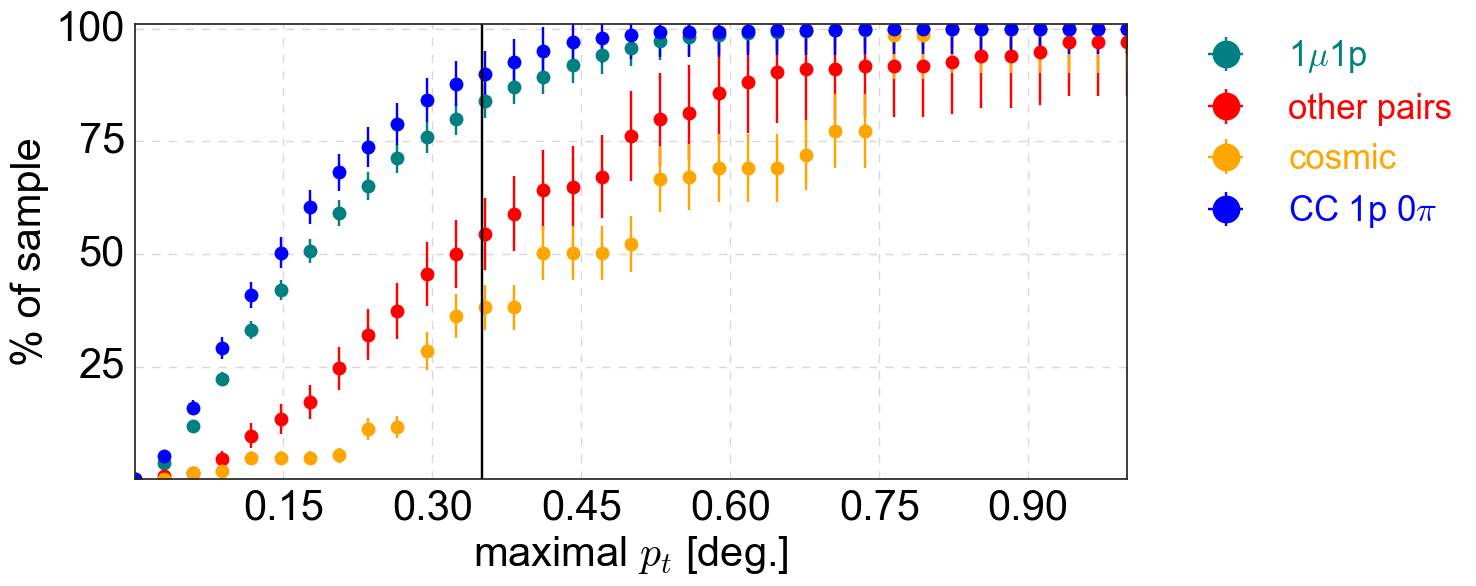

In [10]:
ax,leg=plot_cut_samples(reduced_cut_name='$|\Delta \phi - \pi|<40^{0}$',do_add_legend=True,legend_fontsize=25,markers_size=10               
                     ,cut_var ='reco_Pt', cut_type= 'max',ticks_color='black'                 
                     ,x_label = 'maximal $p_{t}$ [deg.]'
                     ,xmin=0, xmax=1. , Nbins=35,fontsize=30,figsize=(12,6));
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.set_xticks([0.15,0.3,0.45,0.6,0.75,0.9])
plt.plot([0.35,0.35],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'Pt_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

### E$\nu$ in bins of $p_t$ 

In [11]:

bins_labels = ['$p_{t}<0.15$ GeV/c','$0.15<p_{t}<0.25$ GeV/c','$0.25$ GeV/c $<p_{t}$']
bins_colors = ['tomato','royalblue','teal']



39.2 % with ratio< 8 %
18.4 % with ratio< 8 %
13.4 % with ratio< 8 %


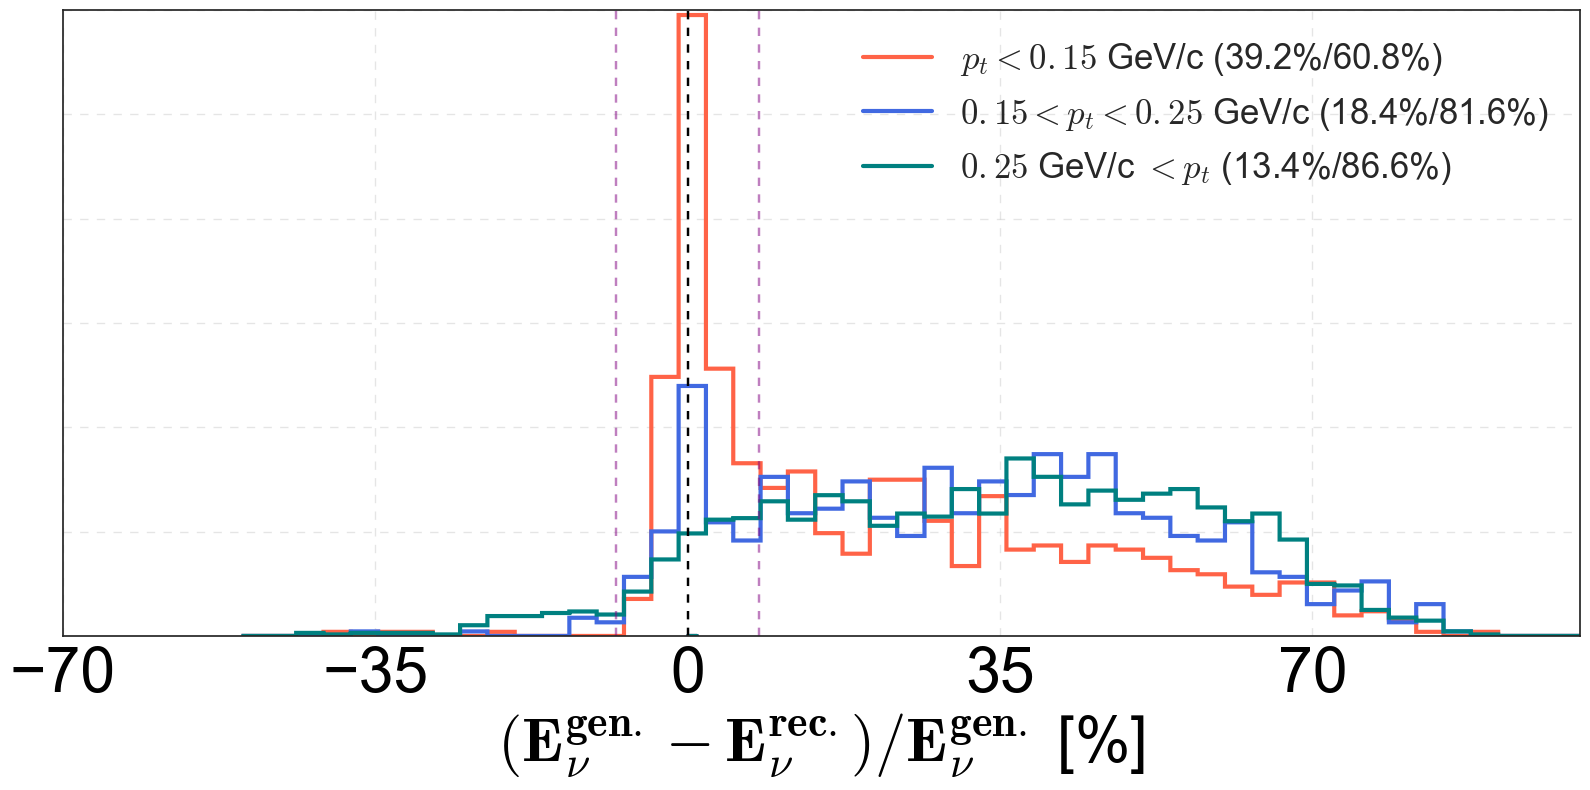

In [12]:
# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p =  reduced_MCsamples['no cut']['1mu-1p']
cuts_s = [mu_p[mu_p['reco_Pt']<0.15],mu_p[(mu_p['reco_Pt']>0.15)&(mu_p['reco_Pt']<0.25)],mu_p[mu_p['reco_Pt']>0.25]]                                

fgood_arr = []
for sample,label,color in zip(cuts_s,bins_labels,bins_colors):
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']
    plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))
    text = '%.1f'%fgood_arr[-1]+'%'+'/%.1f'%(100-fgood_arr[-1])+'%'
    plt.plot([0,0],'-',color=color,label=label+' ('+text+')',linewidth=3)
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
ax.legend(loc='upper right',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig(figures_path+'EvReconstructedBinsPt.pdf')

49.0 % with ratio< 8 %
27.4 % with ratio< 8 %
11.0 % with ratio< 8 %


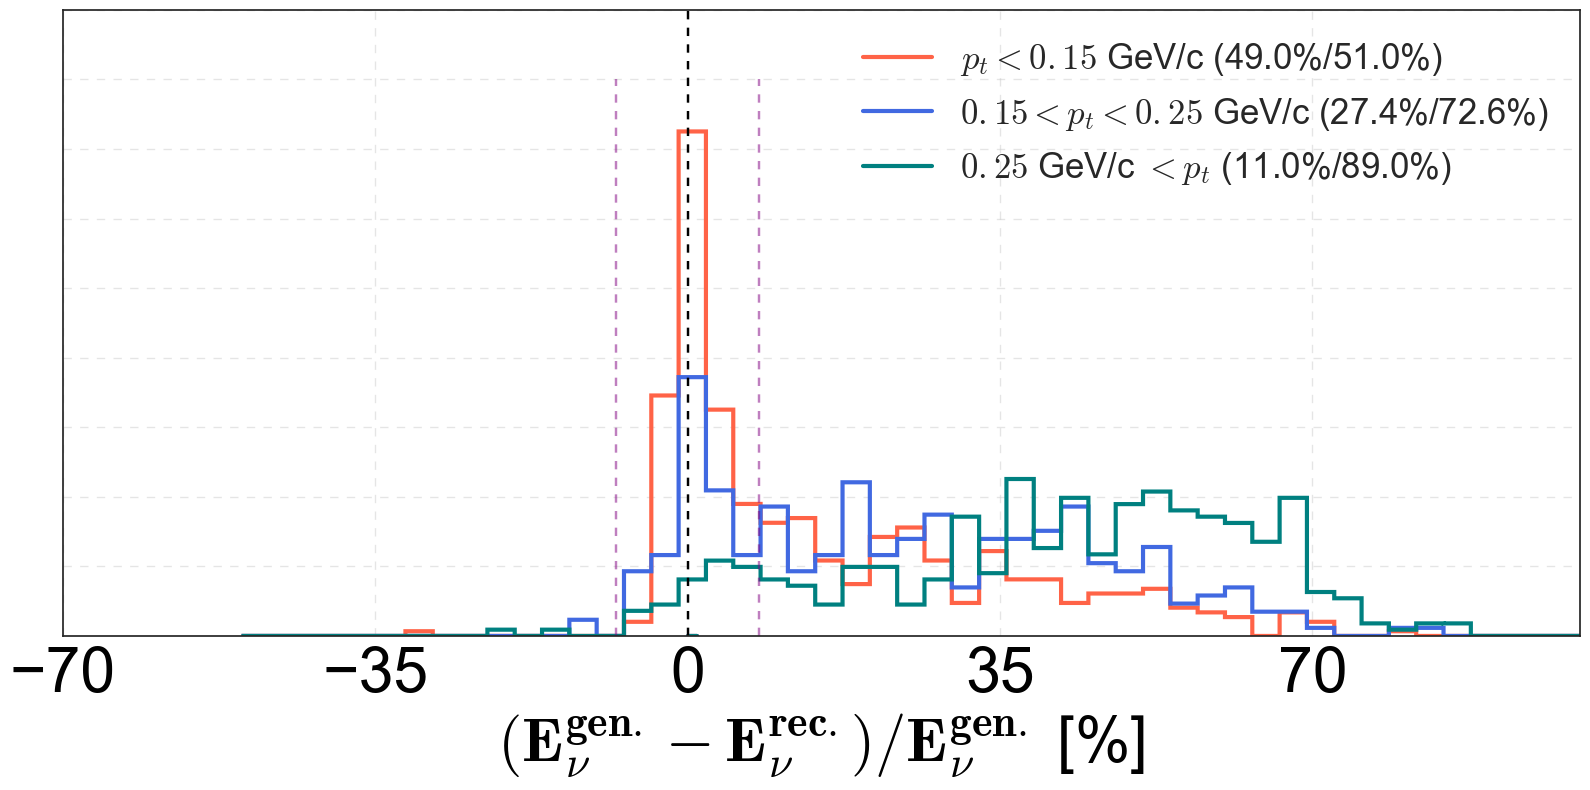

In [13]:

# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p =  reduced_MCsamples['$|\Delta \phi - \pi|<40^{0}$']['1mu-1p']
cuts_s = [mu_p[mu_p['reco_Pt']<0.15],mu_p[(mu_p['reco_Pt']>0.15)&(mu_p['reco_Pt']<0.25)],mu_p[mu_p['reco_Pt']>0.25]]                                

fgood_arr = []
for sample,label,color in zip(cuts_s,bins_labels,bins_colors):
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']    
    plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))
    text = '%.1f'%fgood_arr[-1]+'%'+'/%.1f'%(100-fgood_arr[-1])+'%'
    plt.plot([0,0],'-',color=color,label=label+' ('+text+')',linewidth=3)

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
ax.legend(loc='upper right',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig(figures_path+'EvReconstructedBinsPt_after_cut_DeltaPhi.pdf')

### 7.IV A tight cut on pt for better reconstructed Eν

In [14]:
pur_eff_numbers

,\CCIpOpi,\mup,cosmic,cut name,eff \CCIpOpi,eff \mup,other pairs,pur \CCIpOpi,pur \mup
no cut,1234.0,3814.0,22562.0,no cut,100.000000,100.000000,4001.0,4.062284,12.555552
\CutPIDa,1141.0,3569.0,5261.0,\CutPIDa,92.463533,93.576298,2333.0,10.221267,31.971692
\Cutlmup,953.0,2838.0,2034.0,\Cutlmup,77.228525,74.410068,1149.0,15.827936,47.135027
non-collinearity,917.0,2599.0,569.0,non-collinearity,74.311183,68.143681,736.0,23.488730,66.572746
$\Delta Q$,755.0,1724.0,352.0,$\Delta Q$,61.183144,45.201888,418.0,30.272654,69.125902
\CutDeltaPhi,662.0,1126.0,207.0,\CutDeltaPhi,53.646677,29.522811,134.0,45.126108,76.755283
$\theta_{pq}<25$,563.0,850.0,26.0,$\theta_{pq}<25$,45.623987,22.286314,62.0,60.021322,90.618337
$p_{t}<0.35$,594.0,939.0,79.0,$p_{t}<0.35$,48.136143,24.619822,73.0,54.445463,86.067828
$p_{t}<0.15$,339.0,474.0,10.0,$p_{t}<0.15$,27.471637,12.427897,18.0,67.529880,94.422311


In [17]:
# plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)
print " plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)"
print 
print "			\hline"
print "			cut	 					& \\textcolor{orange}{cosmic}		& \\textcolor{red}{other pairs} 		& \\textcolor{teal}{\mup} 		& \\textcolor{blue}{\CCIpOpi}  			& purity \\textcolor{teal}{\mup} (\\textcolor{blue}{\CCIpOpi}) 	& efficiency \\textcolor{teal}{\mup} (\\textcolor{blue}{\CCIpOpi}) 		\\tabularnewline"
print "\hline \hline"
for i,row in pur_eff_numbers.iterrows():
    if "theta_{pq}" in row['cut name'] or "p_{t}" in row['cut name']:
        print "			"+row['cut name']+"\
        & \\textcolor{orange}{%d"%row['cosmic']+"}\
        & \\textcolor{red}{%d"%row['other pairs']+"}\
        & \\textcolor{teal}{%d"%row['\mup']+"}\
        & \\textcolor{blue}{%d"%row['\CCIpOpi']+"}\
        & \\textcolor{teal}{%.1f"%(float(row['pur \mup']))+"\%"+"}"+"(\\textcolor{blue}{%.1f"%(float(row['pur \CCIpOpi']))+"\%"+")}\
        & \\textcolor{teal}{%.1f"%(float(row['eff \mup']))+"\%"+"}"+"(\\textcolor{blue}{%.1f"%(float(row['eff \CCIpOpi']))+"\%"+")}\
        \\tabularnewline"
        print "\hline"
print
print

 plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)

			\hline
			cut	 					& \textcolor{orange}{cosmic}		& \textcolor{red}{other pairs} 		& \textcolor{teal}{\mup} 		& \textcolor{blue}{\CCIpOpi}  			& purity \textcolor{teal}{\mup} (\textcolor{blue}{\CCIpOpi}) 	& efficiency \textcolor{teal}{\mup} (\textcolor{blue}{\CCIpOpi}) 		\tabularnewline
\hline \hline
			$\theta_{pq}<25$        & \textcolor{orange}{26}        & \textcolor{red}{62}        & \textcolor{teal}{850}        & \textcolor{blue}{563}        & \textcolor{teal}{90.6\%}(\textcolor{blue}{60.0\%)}        & \textcolor{teal}{22.3\%}(\textcolor{blue}{45.6\%)}        \tabularnewline
\hline
			$p_{t}<0.35$        & \textcolor{orange}{79}        & \textcolor{red}{73}        & \textcolor{teal}{939}        & \textcolor{blue}{594}        & \textcolor{teal}{86.1\%}(\textcolor{blue}{54.4\%)}        & \textcolor{teal}{24.6\%}(\textcolor{blue}{48.1\%)}        \tabularnewline
\hline
			$p_{t}<0.15$        

## Following Andy' Comment - reconstruction of $E_\nu$ using information from the lepton only

$ E_\nu = \frac{2M_n^* E_\mu - ( (M_n^*)^2 +m_\mu^2 - M_p^2)}{ 2[(M_n^*) -E_\mu + p_\mu \cos \theta_\mu ]} $
### where
$ M_n^* = M_n - E_B =  M_n - (34\pm 8)$  MeV/c^2

In [7]:
m_mu = 0.1056
M_p = 0.938
M_n = 0.939
E_B = 0.034 # +/- 0.008
M_n_star = M_n - E_B

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


7.0 % with ratio< 8 %
9.5 % with ratio< 8 %
12.0 % with ratio< 8 %
20.4 % with ratio< 8 %


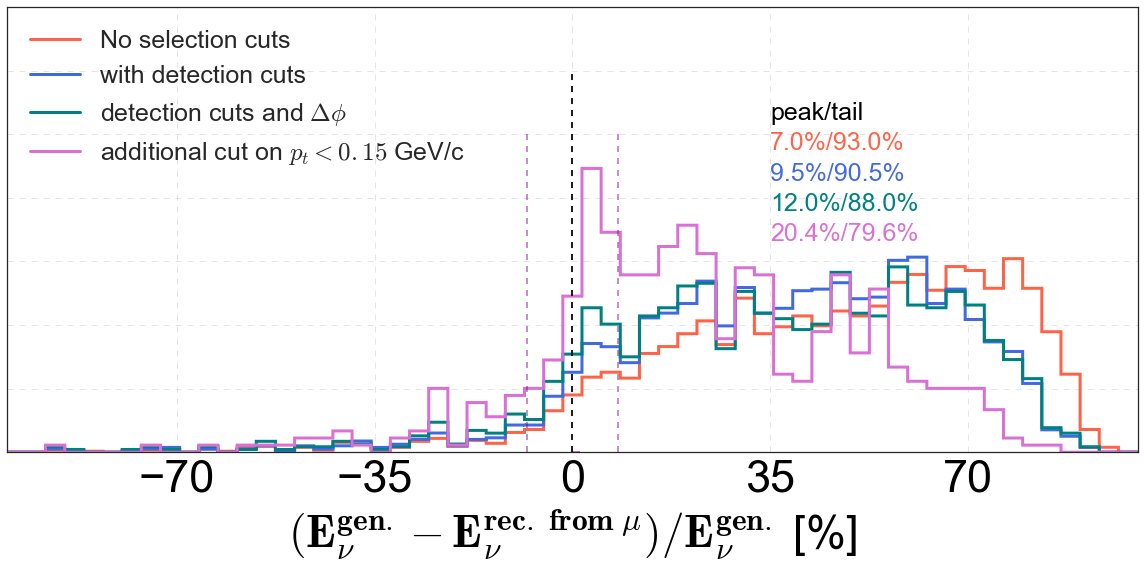

In [24]:
# Ev before and after the cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,60)
fgood_arr = []
cuts   = ['no cut','vertex activity', 'delta phi' , 'tight Pt' ]                                
cut_labels = ['No selection cuts','with detection cuts','detection cuts and $\\Delta \\phi$', 'additional cut on $p_{t}<0.15$ GeV/c']
cut_colors = ['tomato','royalblue','teal','Orchid']
for cut_name,label,color in zip(cuts,cut_labels,cut_colors):
    sample = reduced_MCbnbDATAcosmicSamples[cut_name]['1mu-1p']
        
    sample['reco_Emu'] = np.sqrt( np.square(m_mu) + np.square(sample['reco_Pmu']) )
    numerator =  2*M_n_star*sample['reco_Emu'] - ( np.square(M_n_star) + np.square(m_mu) - np.square(M_p) )
    denominator = 2*( M_n_star - sample['reco_Emu'] + sample['reco_Pmu']*np.cos(sample['reco_Pmu_theta']))
    sample['reco_Ev_from_mu'] = numerator/denominator

    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev_from_mu'])/sample['closest_genie_Ev']
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( 35 , 0.95*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='black' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,cut_colors):    
    plt.text( 35 , 0.95*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%'  , fontsize=25 , color=color )
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
# ax.set_title('all $\\mu p$ pairs',fontsize=25,y=1.02)
ax.legend(loc='upper left',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.\ from\ \mu}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructed_from_muon.pdf')


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


6.9 % with ratio< 8 %
9.0 % with ratio< 8 %
11.2 % with ratio< 8 %
21.7 % with ratio< 8 %


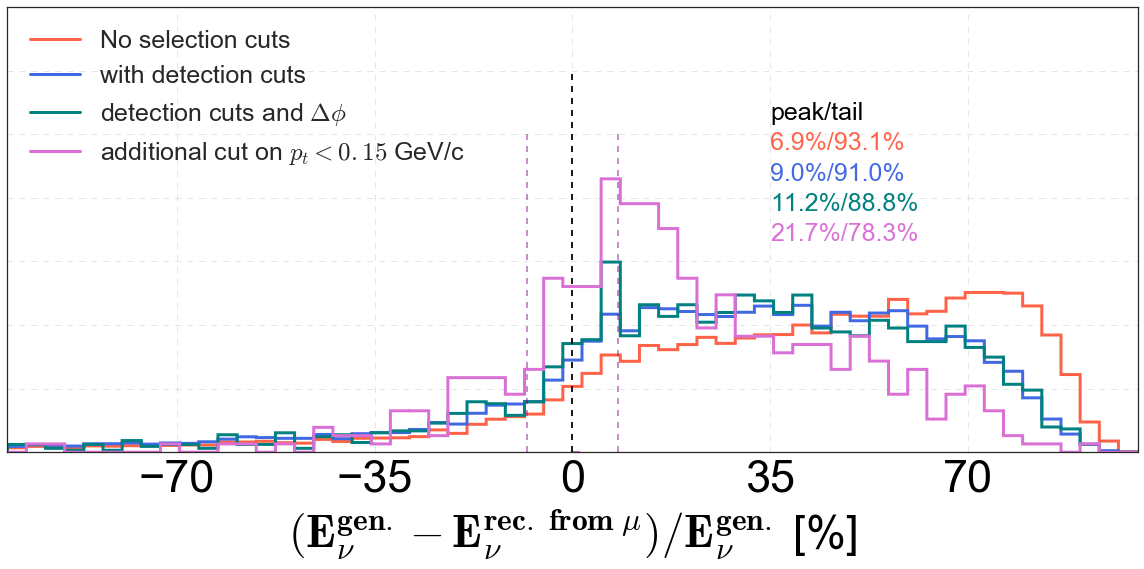

In [25]:
# Ev before and after the cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,60)
fgood_arr = []
cuts   = ['no cut','vertex activity', 'delta phi' , 'tight Pt' ]                                
cut_labels = ['No selection cuts','with detection cuts','detection cuts and $\\Delta \\phi$', 'additional cut on $p_{t}<0.15$ GeV/c']
cut_colors = ['tomato','royalblue','teal','Orchid']
for cut_name,label,color in zip(cuts,cut_labels,cut_colors):
    sample = reduced_MCbnbMCcosmicSamples[cut_name]['1mu-1p']
        
    sample['reco_Emu'] = np.sqrt( np.square(m_mu) + np.square(sample['reco_Pmu']) )
    numerator =  2*M_n_star*sample['reco_Emu'] - ( np.square(M_n_star) + np.square(m_mu) - np.square(M_p) )
    denominator = 2*( M_n_star - sample['reco_Emu'] + sample['reco_Pmu']*np.cos(sample['reco_Pmu_theta']))
    sample['reco_Ev_from_mu'] = numerator/denominator

    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev_from_mu'])/sample['closest_genie_Ev']
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( 35 , 0.95*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='black' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,cut_colors):    
    plt.text( 35 , 0.95*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%'  , fontsize=25 , color=color )
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
# ax.set_title('all $\\mu p$ pairs',fontsize=25,y=1.02)
ax.legend(loc='upper left',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.\ from\ \mu}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()